Pasos generales:

1. Exploratory Data Analysis (EDA)
2. Tratamiento de valores faltantes
3. Conversión de variables categóricas a numéricas
4. Ingeniería de características
5. Normalización o escalado de datos si es necesario
6. División del conjunto de datos (train-test split)
7. Modelado de regresión
8. Evaluación del modelo usando RMSE
9. Predicción para el conjunto de test y generación del archivo de predicciones

In [52]:
import pandas as pd
import numpy as np

data = pd.read_csv('files/train.csv')


In [53]:
data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [54]:
data.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


## EDA
Tratamiento de los valores faltantes

In [56]:
data.duplicated().sum()

0

In [57]:
data.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

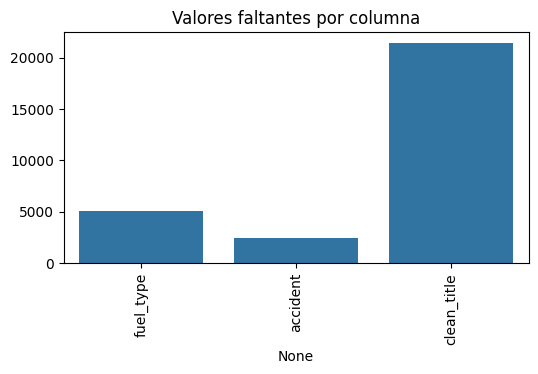

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de valores faltantes
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Graficamos la cantidad de valores faltantes por característica
plt.figure(figsize=(6, 3))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Valores faltantes por columna')
plt.xticks(rotation=90)
plt.show()

In [59]:
# Comprobar cuantos valores único hay en cada columna y que deje un espacio para que los valores estén alineados a la izquierda
for col in data.columns:    
    print(f'{col:15}: {data[col].nunique()}')



id             : 188533
brand          : 57
model          : 1897
model_year     : 34
milage         : 6651
fuel_type      : 7
engine         : 1117
transmission   : 52
ext_col        : 319
int_col        : 156
accident       : 2
clean_title    : 1
price          : 1569


### Tratamiento de valores faltantes
**fuel_type**: Como es una característica categórica, podemos usar la moda para imputar los valores faltantes, ya que probablemente el tipo de combustible sea el mismo para coches similares.

**accident**: Los valores faltantes aquí podrían ser interpretados como coches que no han tenido accidentes, por lo que una opción sería imputar estos valores faltantes como 'None reported'.

**clean_title**: En este caso, los valores faltantes pueden indicar que la información no está disponible. Si es crítica para el modelo, imputar con la moda o eliminar las filas podría ser una opción, aunque eliminar tantos registros puede no ser recomendable.

In [60]:
# Imputar valores faltantes en fuel_type con la moda
data['fuel_type'].fillna(data['fuel_type'].mode()[0], inplace=True)

# Imputar valores faltantes en accident con 'None reported'
data['accident'].fillna('None reported', inplace=True)

# Imputar clean_title con la moda, o decidir si eliminarlo
data['clean_title'].fillna(data['clean_title'].mode()[0], inplace=True)

# Verificar valores faltantes después de la imputación
print(data.isnull().sum())

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64


/var/folders/6l/xc4cvh3j3zj9b4f6zl1r0m100000gn/T/ipykernel_23980/144113070.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['fuel_type'].fillna(data['fuel_type'].mode()[0], inplace=True)
/var/folders/6l/xc4cvh3j3zj9b4f6zl1r0m100000gn/T/ipykernel_23980/144113070.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

## Normalización de datos y conversión de variables categóricas
### Normalización
La normalización o escalado (con StandardScaler o MinMaxScaler) se aplica generalmente a variables continuas, como el kilometraje (milage), para evitar que los valores altos dominen el modelo. Aquí es necesario aplicar normalización si vamos a utilizar modelos que se vean afectados por las escalas de los datos, como redes neuronales o regresión lineal.

In [61]:
# from sklearn.preprocessing import StandardScaler

# # Normalización de características continuas
# scaler = StandardScaler()
# data[['milage']] = scaler.fit_transform(data[['milage']])
# # Imprimir las primeras filas del conjunto de datos de milage para ver la normalización
# print(data[['milage']].head())


### Conversión de variables categóricas
Para las variables categóricas, se suele usar OrdinalEncoder si hay un orden implícito, o OneHotEncoder para variables sin orden (como fuel_type o brand). En este caso, usaremos OneHotEncoder para las variables categóricas.

In [64]:
print(data.columns)

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')


In [66]:
import re

def clean_engine_column(engine_str):
    # Extract the engine size (e.g., '2.7L')
    engine_size_match = re.search(r'(\d+\.\d+)L', engine_str)
    engine_size = float(engine_size_match.group(1)) if engine_size_match else None
    
    # Extract the horsepower (e.g., 'V6 24V PDI DOHC Twin Turbo' -> 6)
    engine_hp_match = re.search(r'(\d+)', engine_str)
    engine_hp = int(engine_hp_match.group(1)) if engine_hp_match else None
    
    return pd.Series([engine_hp, engine_size])

# Aplicar la función de limpieza a la columna 'engine'
data[['engine_hp', 'engine_size']] = data['engine'].apply(clean_engine_column)

# Eliminar la columna original 'engine' si ya no es necesaria
# data = data.drop(columns=['engine'])

# Mostrar el DataFrame limpio
print(data)

            id          brand                     model  model_year  milage  \
0            0           MINI             Cooper S Base        2007  213000   
1            1        Lincoln                     LS V8        2002  143250   
2            2      Chevrolet         Silverado 2500 LT        2002  136731   
3            3        Genesis          G90 5.0 Ultimate        2017   19500   
4            4  Mercedes-Benz               Metris Base        2021    7388   
...        ...            ...                       ...         ...     ...   
188528  188528       Cadillac     Escalade ESV Platinum        2017   49000   
188529  188529  Mercedes-Benz  AMG C 43 AMG C 43 4MATIC        2018   28600   
188530  188530  Mercedes-Benz    AMG GLC 63 Base 4MATIC        2021   13650   
188531  188531           Audi          S5 3.0T Prestige        2022   13895   
188532  188532        Porsche                Macan Base        2016   59500   

            fuel_type                              

In [67]:
from sklearn.preprocessing import OneHotEncoder

# Identificar las columnas categóricas
categorical_cols = ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

# Aplicar OneHotEncode
ohe = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = ohe.fit_transform(data[categorical_cols])

# Crear un DataFrame con las columnas codificadas
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(categorical_cols))

# Añadir las columnas codificadas al conjunto de datos original y eliminar las originales
data = data.drop(columns=categorical_cols)
data = pd.concat([data, encoded_df], axis=1)


# Ingeniería de características
Podemos generar nuevas características o simplificar algunas existentes:

- **División de la columna `engine`**: Podríamos extraer información relevante como el número de cilindros y potencia (HP).

- **Eliminación de variables con alta correlación**: Calculamos la correlación entre las características continuas. Si dos características están altamente correlacionadas, podemos eliminar una de ellas para reducir la dimensionalidad.

- **PCA**: Solo lo aplicaríamos si tenemos muchas variables altamente correlacionadas o si el modelo se beneficia de la reducción de dimensiones. No parece necesario en este caso ya que la cantidad de características no es muy elevada.

In [68]:
from datetime import datetime

# Calcular la edad del coche
current_year = datetime.now().year
data['Age'] = current_year - data['model_year']

# Eliminar la columna 'model_year' ya que ahora tenemos la edad
data.drop('model_year', axis=1, inplace=True)

# Verificar las primeras filas para comprobar el cálculo
print(data[['Age', 'price']].head())


   Age  price
0   17   4200
1   22   4999
2   22  13900
3    7  45000
4    3  97500


In [69]:
# Samplear el 10% de los datos
sample_data = data.sample(frac=0.1, random_state=42)

# Seleccionar variables numéricas del subconjunto
numeric_features = sample_data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación solo para las variables numéricas
corr_matrix = numeric_features.corr()

# Características con alta correlación con 'price'
high_corr_features = corr_matrix.index[abs(corr_matrix['price']) > 0.8]
print("Características altamente correlacionadas:", high_corr_features)

Características altamente correlacionadas: Index(['price'], dtype='object')


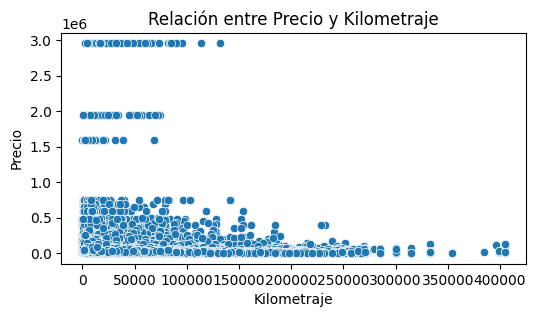

In [70]:

# Visualizar la relación entre 'price' y otra variable, por ejemplo, 'milage'
plt.figure(figsize=(6, 3))
sns.scatterplot(data=data, x='milage', y='price')
plt.title('Relación entre Precio y Kilometraje')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.show()


# Modelado de regresión y evaluación
Una vez hemos preprocesado y transformado los datos, podemos entrenar un modelo de regresión. Usaremos un modelo básico como Regresión Lineal o Random Forest Regressor y evaluaremos el desempeño con RMSE.

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Separar las características y la variable objetivo
X = data.drop(columns=['price', 'id'])
y = data['price']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


ValueError: could not convert string to float: '208.0HP 2.0L 4 Cylinder Engine Flex Fuel Capability'

# Predicción en el conjunto de test
Finalmente, hacemos predicciones en el archivo test.csv y generamos el archivo de envío:

In [ ]:
# Cargar el archivo test.csv
test_data = pd.read_csv('file/test.csv')

# Aplicar el mismo preprocesamiento que en el conjunto de entrenamiento
# (rellenar valores faltantes, codificación de variables categóricas, normalización, etc.)

# Realizar las predicciones
test_data['price'] = model.predict(test_data.drop(columns=['id']))

# Generar el archivo de envío
submission = test_data[['id', 'price']]
submission.to_csv('submission.csv', index=False)
